In [1]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,6)
plt.rcParams['figure.dpi']=250
%matplotlib inline
import keras
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, KFold
from keras.optimizers import Adam 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\Prerana\Downloads\gas_turbines.csv")
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [3]:
df= df.drop(['AFDP','GTEP','TIT','TAT','CDP','CO','NOX'],axis=1)
df.head()

,AT,AP,AH,TEY
0,6.8594,1007.9,96.799,114.70
1,6.7850,1008.4,97.118,114.72
2,6.8977,1008.8,95.939,114.71
3,7.0569,1009.2,95.249,114.72
4,7.3978,1009.7,95.150,114.72


In [4]:
df.describe()

,AT,AP,AH,TEY
count,15039.000000,15039.00000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,134.188464
std,7.574323,6.41076,13.793439,15.829717
min,0.522300,985.85000,30.344000,100.170000
25%,11.408000,1008.90000,69.750000,127.985000
50%,18.186000,1012.80000,82.266000,133.780000
75%,23.862500,1016.90000,90.043500,140.895000
max,34.929000,1034.20000,100.200000,174.610000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   TEY     15039 non-null  float64
dtypes: float64(4)
memory usage: 470.1 KB


In [6]:
df.isna().sum()

AT     0
AP     0
AH     0
TEY    0
dtype: int64

In [7]:
df.duplicated().sum()

0

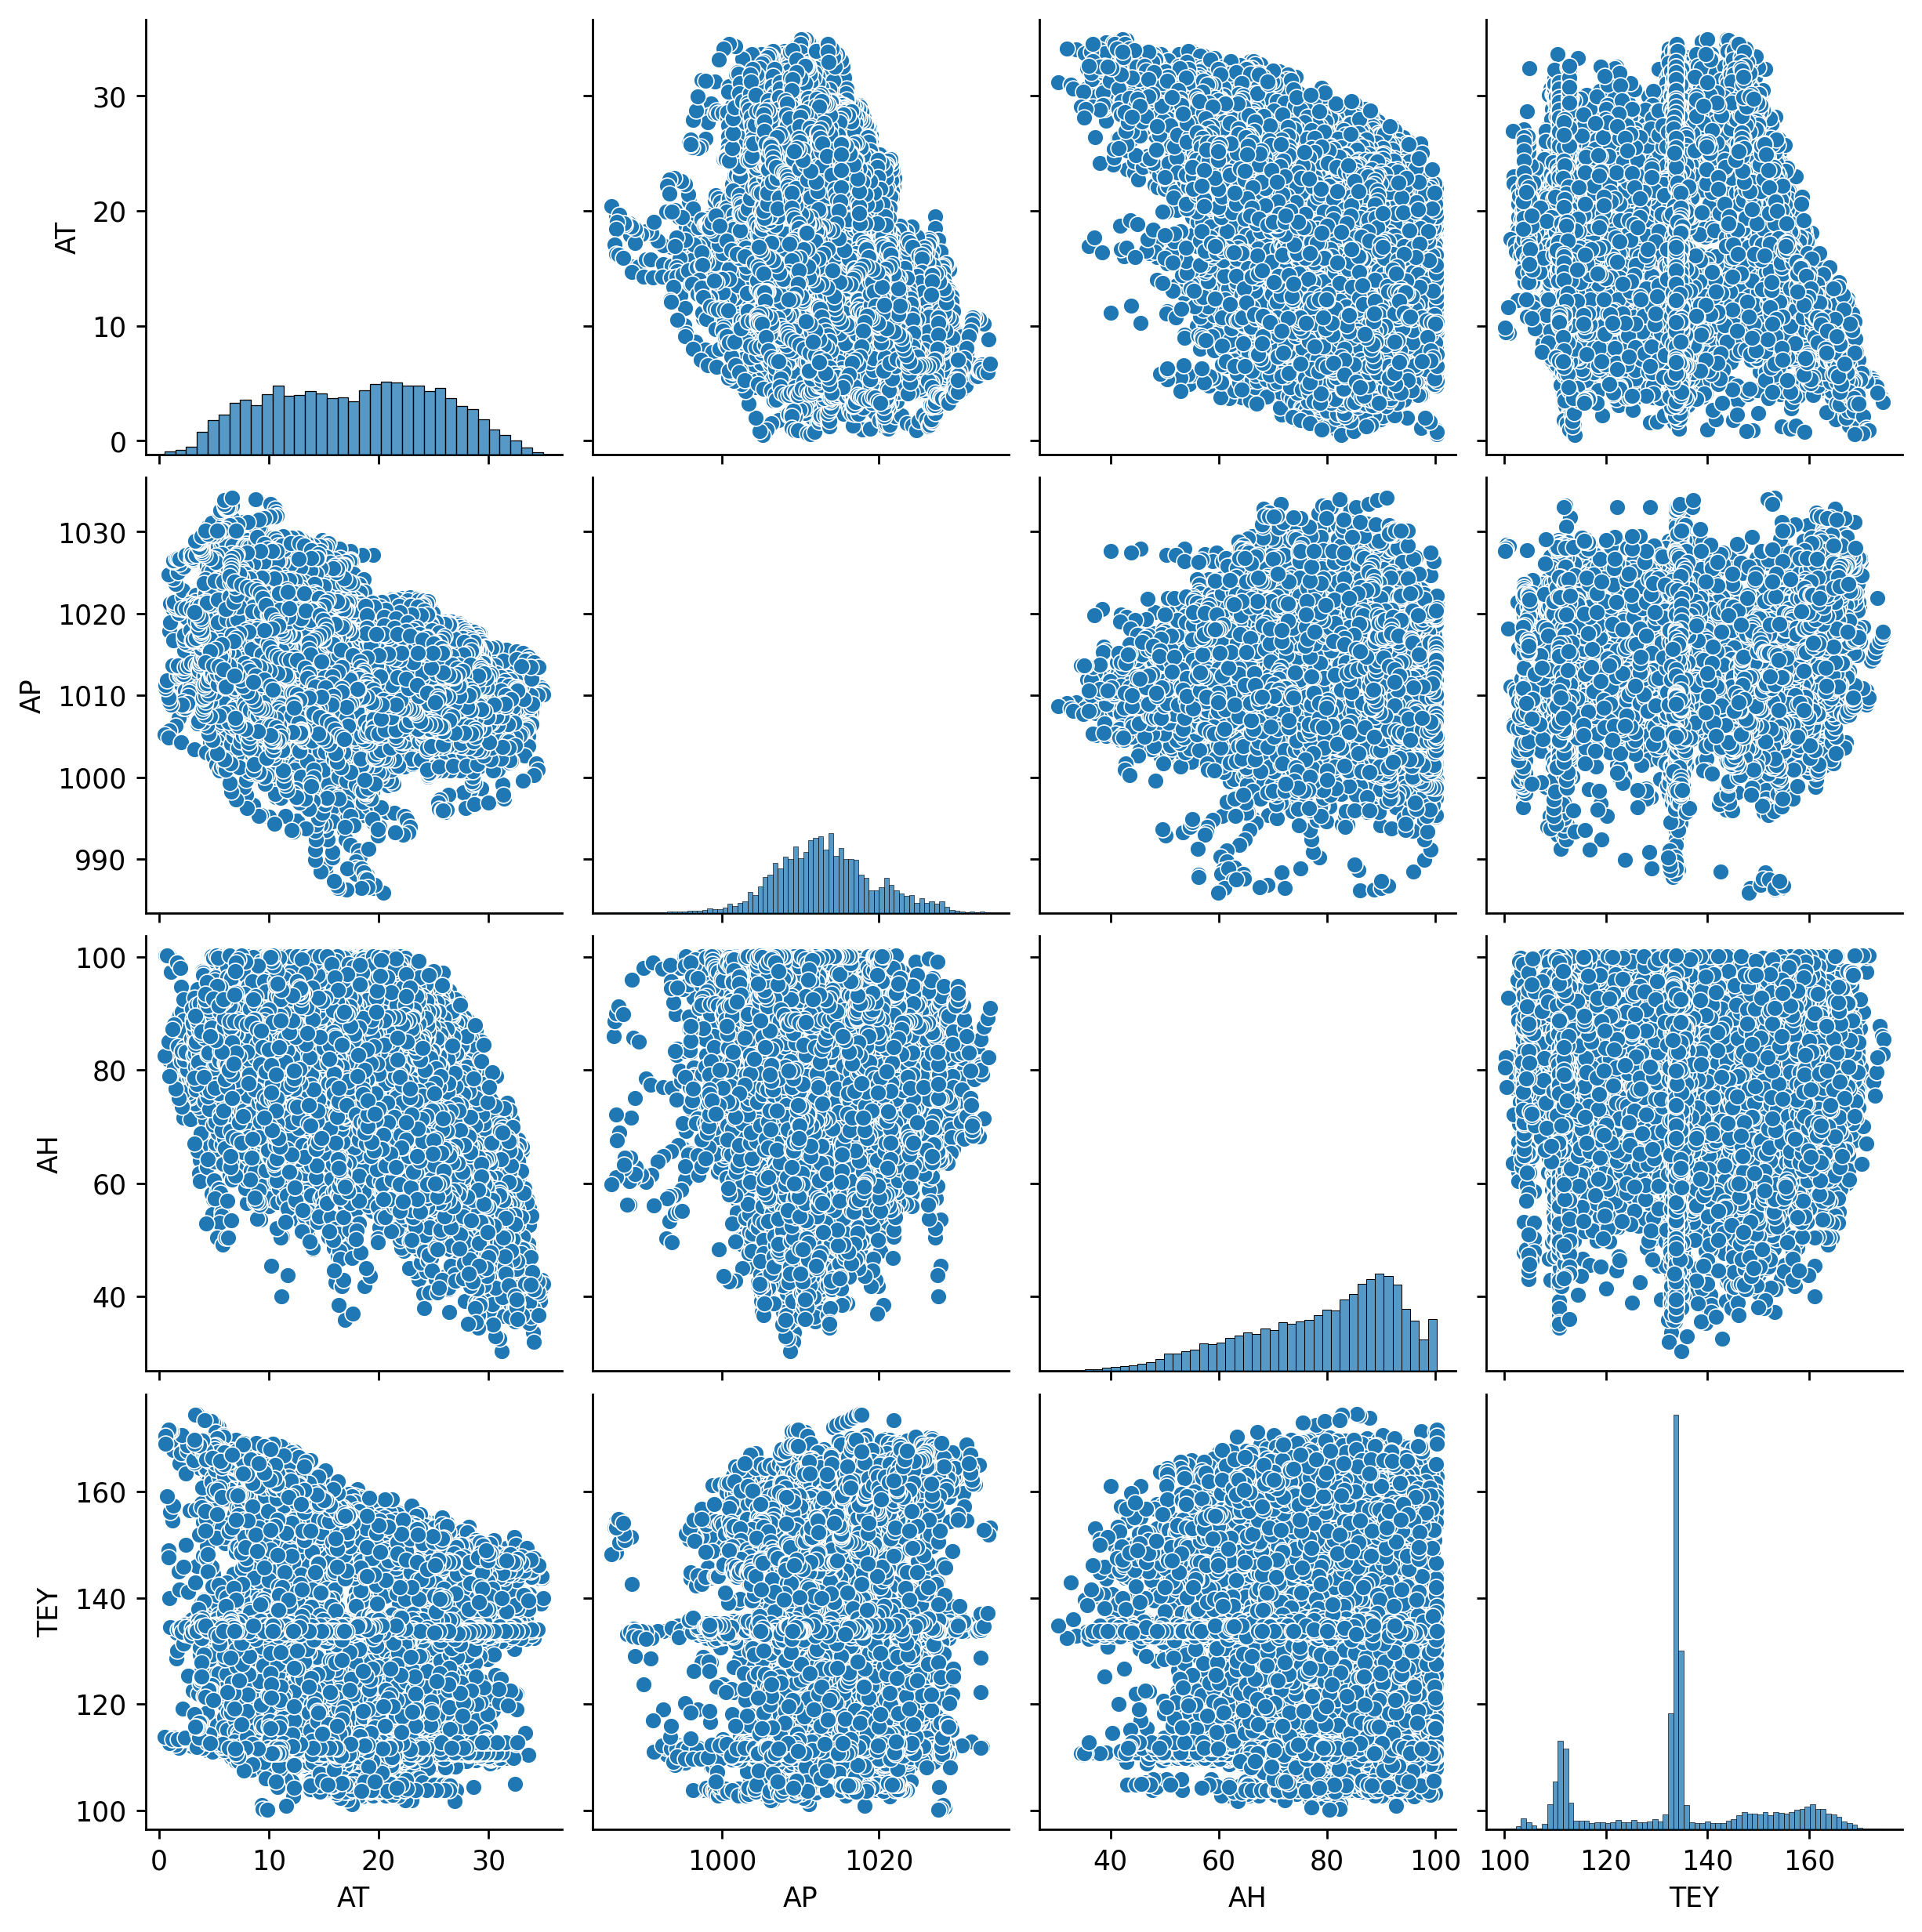

In [8]:
sns.pairplot(df)

In [9]:
df.corr()

,AT,AP,AH,TEY
AT,1.000000,-0.412953,-0.549432,-0.207495
AP,-0.412953,1.000000,0.042573,0.146939
AH,-0.549432,0.042573,1.000000,-0.110272
TEY,-0.207495,0.146939,-0.110272,1.000000


<AxesSubplot:>

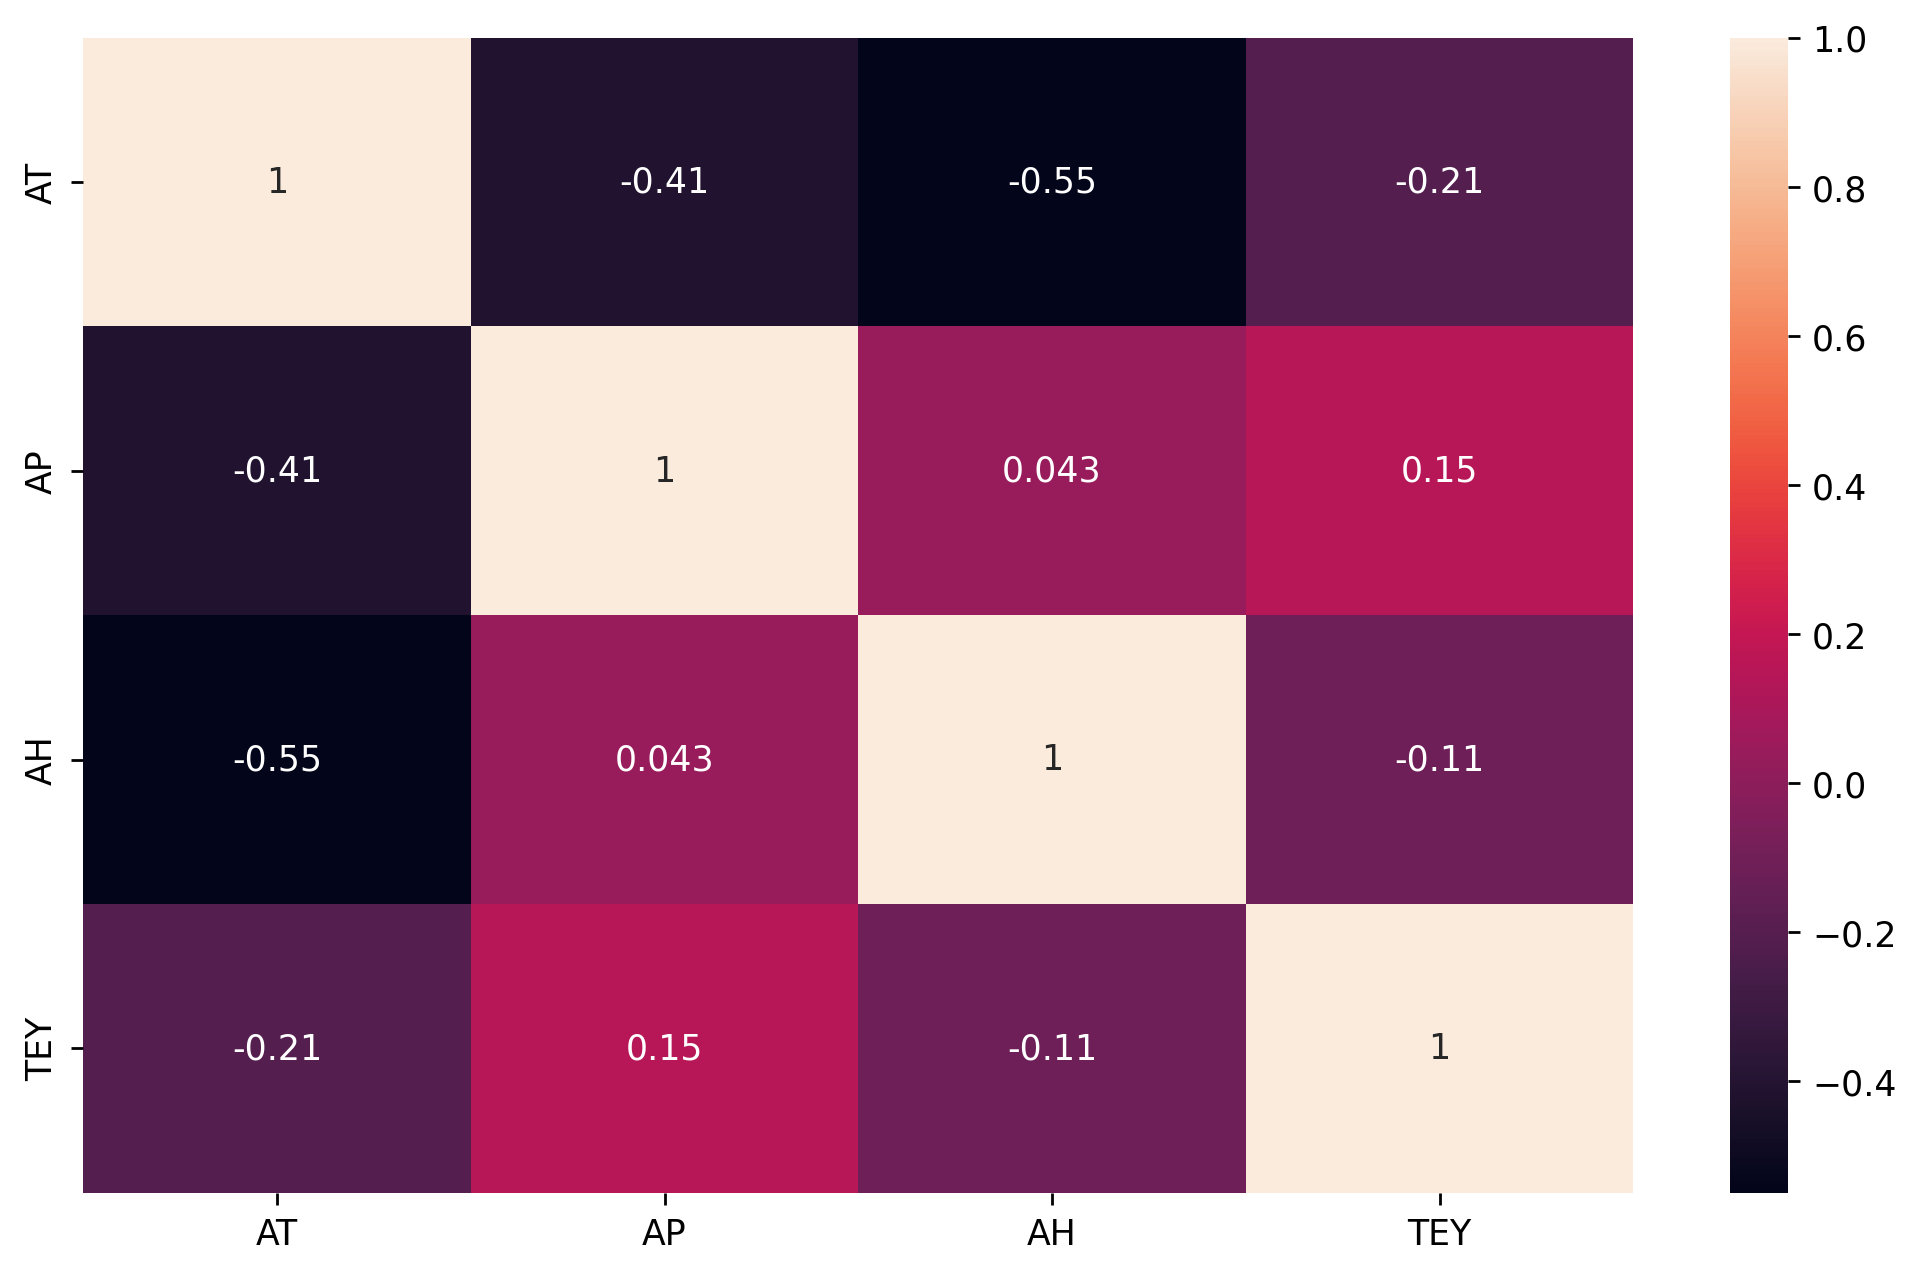

In [10]:
sns.heatmap(df.corr(),annot=True)

In [11]:
x=df.iloc[:,1:5]
y=df.iloc[:,0]

In [12]:
x

,AP,AH,TEY
0,1007.9,96.799,114.70
1,1008.4,97.118,114.72
2,1008.8,95.939,114.71
3,1009.2,95.249,114.72
4,1009.7,95.150,114.72
...,...,...,...
15034,1005.6,98.460,111.61
15035,1005.9,99.093,111.78
15036,1006.3,99.496,110.19
15037,1006.8,99.008,110.74


In [13]:
y

0        6.8594
1        6.7850
2        6.8977
3        7.0569
4        7.3978
          ...  
15034    9.0301
15035    7.8879
15036    7.2647
15037    7.0060
15038    6.9279
Name: AT, Length: 15039, dtype: float64

In [14]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=3,  kernel_initializer='uniform', activation='relu'))
model.add(Dense(8,  kernel_initializer='uniform', activation='relu'))
model.add(Dense(1,  kernel_initializer='uniform', activation='sigmoid'))

In [15]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
history= model.fit(x, y,validation_split=0.33, epochs=150, batch_size=10)

Epoch 1/150
1008/1008 [==============================] - 8s 4ms/step - loss: -701441.8750 - accuracy: 0.0000e+00 - val_loss: -3543236.0000 - val_accuracy: 0.0000e+00
Epoch 2/150
1008/1008 [==============================] - 3s 3ms/step - loss: -9761012.0000 - accuracy: 0.0000e+00 - val_loss: -24556424.0000 - val_accuracy: 0.0000e+00
Epoch 3/150
1008/1008 [==============================] - 3s 3ms/step - loss: -36410676.0000 - accuracy: 0.0000e+00 - val_loss: -70711792.0000 - val_accuracy: 0.0000e+00
Epoch 4/150
1008/1008 [==============================] - 3s 3ms/step - loss: -84835408.0000 - accuracy: 0.0000e+00 - val_loss: -145784832.0000 - val_accuracy: 0.0000e+00
Epoch 5/150
1008/1008 [==============================] - 3s 3ms/step - loss: -157705856.0000 - accuracy: 0.0000e+00 - val_loss: -252870512.0000 - val_accuracy: 0.0000e+00
Epoch 6/150
1008/1008 [==============================] - 3s 3ms/step - loss: -257431808.0000 - accuracy: 0.0000e+00 - val_loss: -394848640.0000 - val_accura

1008/1008 [==============================] - 3s 3ms/step - loss: -62817026048.0000 - accuracy: 0.0000e+00 - val_loss: -80515563520.0000 - val_accuracy: 0.0000e+00
Epoch 49/150
1008/1008 [==============================] - 3s 3ms/step - loss: -66486022144.0000 - accuracy: 0.0000e+00 - val_loss: -85171109888.0000 - val_accuracy: 0.0000e+00
Epoch 50/150
1008/1008 [==============================] - 3s 3ms/step - loss: -70295560192.0000 - accuracy: 0.0000e+00 - val_loss: -90006208512.0000 - val_accuracy: 0.0000e+00
Epoch 51/150
1008/1008 [==============================] - 3s 3ms/step - loss: -74247798784.0000 - accuracy: 0.0000e+00 - val_loss: -95014936576.0000 - val_accuracy: 0.0000e+00
Epoch 52/150
1008/1008 [==============================] - 3s 3ms/step - loss: -78337490944.0000 - accuracy: 0.0000e+00 - val_loss: -100197941248.0000 - val_accuracy: 0.0000e+00
Epoch 53/150
1008/1008 [==============================] - 3s 3ms/step - loss: -82574729216.0000 - accuracy: 0.0000e+00 - val_loss: -

1008/1008 [==============================] - 3s 3ms/step - loss: -411004436480.0000 - accuracy: 0.0000e+00 - val_loss: -519755792384.0000 - val_accuracy: 0.0000e+00
Epoch 95/150
1008/1008 [==============================] - 3s 3ms/step - loss: -423504084992.0000 - accuracy: 0.0000e+00 - val_loss: -535491510272.0000 - val_accuracy: 0.0000e+00
Epoch 96/150
1008/1008 [==============================] - 3s 3ms/step - loss: -436265156608.0000 - accuracy: 0.0000e+00 - val_loss: -551548551168.0000 - val_accuracy: 0.0000e+00
Epoch 97/150
1008/1008 [==============================] - 3s 3ms/step - loss: -449276444672.0000 - accuracy: 0.0000e+00 - val_loss: -567903518720.0000 - val_accuracy: 0.0000e+00
Epoch 98/150
1008/1008 [==============================] - 3s 3ms/step - loss: -462517633024.0000 - accuracy: 0.0000e+00 - val_loss: -584555233280.0000 - val_accuracy: 0.0000e+00
Epoch 99/150
1008/1008 [==============================] - 3s 3ms/step - loss: -476039905280.0000 - accuracy: 0.0000e+00 - v

Epoch 140/150
1008/1008 [==============================] - 3s 3ms/step - loss: -1280418775040.0000 - accuracy: 0.0000e+00 - val_loss: -1611499700224.0000 - val_accuracy: 0.0000e+00
Epoch 141/150
1008/1008 [==============================] - 3s 3ms/step - loss: -1306843807744.0000 - accuracy: 0.0000e+00 - val_loss: -1644645318656.0000 - val_accuracy: 0.0000e+00
Epoch 142/150
1008/1008 [==============================] - 3s 3ms/step - loss: -1333660614656.0000 - accuracy: 0.0000e+00 - val_loss: -1678296743936.0000 - val_accuracy: 0.0000e+00
Epoch 143/150
1008/1008 [==============================] - 3s 3ms/step - loss: -1360835510272.0000 - accuracy: 0.0000e+00 - val_loss: -1712356196352.0000 - val_accuracy: 0.0000e+00
Epoch 144/150
1008/1008 [==============================] - 3s 3ms/step - loss: -1388364562432.0000 - accuracy: 0.0000e+00 - val_loss: -1746912280576.0000 - val_accuracy: 0.0000e+00
Epoch 145/150
1008/1008 [==============================] - 3s 3ms/step - loss: -1416288796672.0

In [17]:
scores = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

470/470 [==============================] - 1s 2ms/step - loss: -1704121466880.0000 - accuracy: 0.0000e+00
accuracy: 0.00%


In [18]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

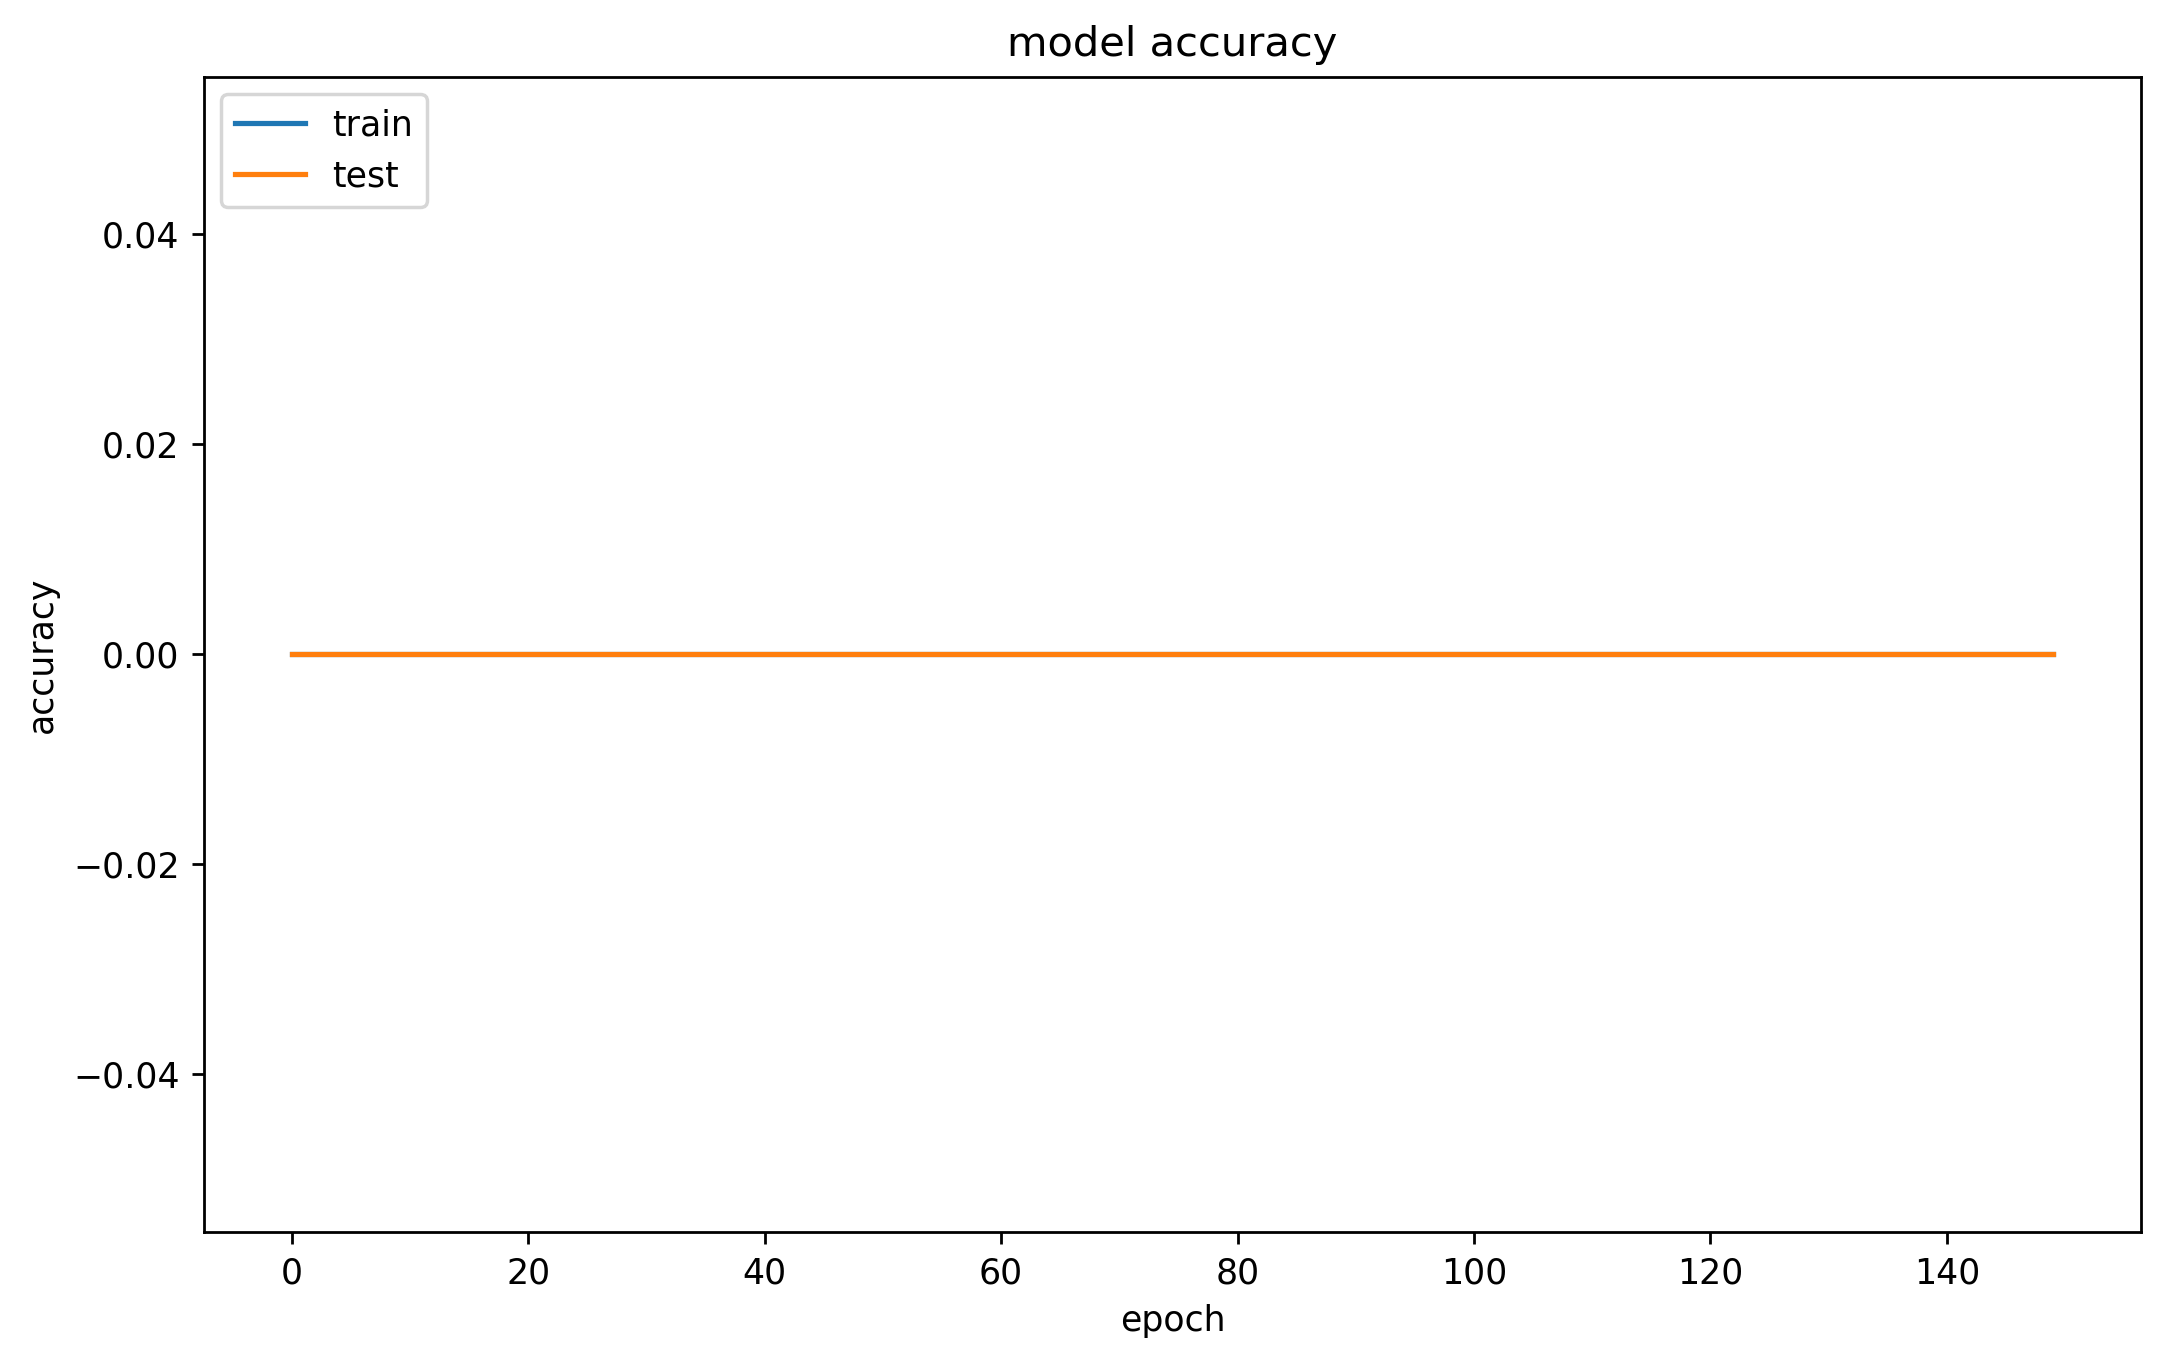

In [19]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

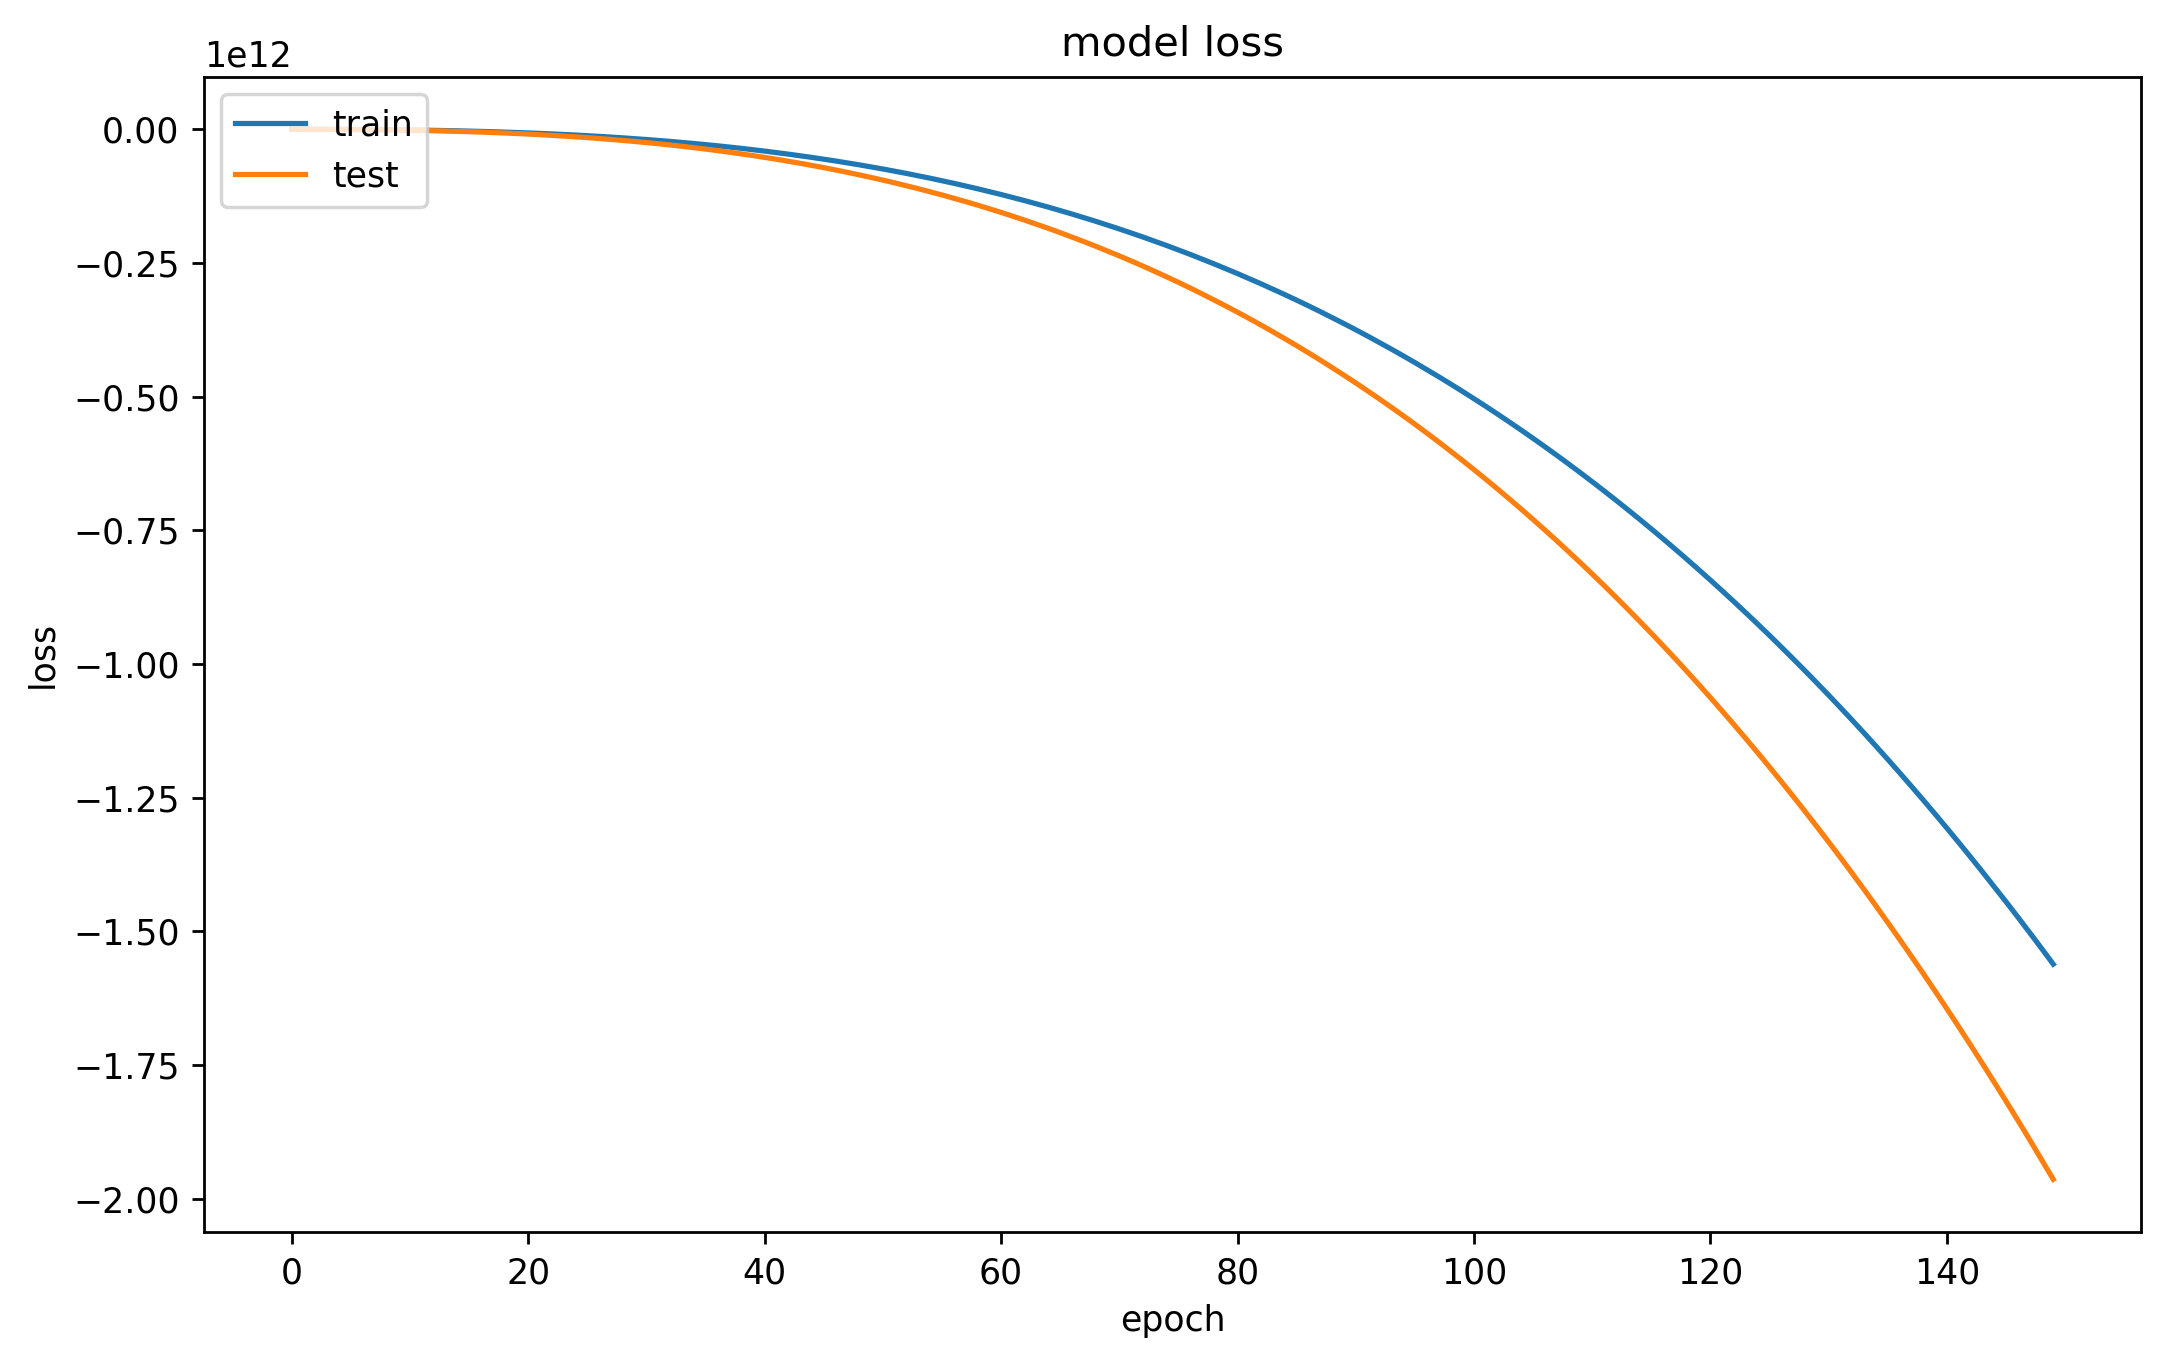

In [20]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [21]:
sc  = StandardScaler()

XT = sc.fit_transform(x)

In [22]:
pd.DataFrame(XT).describe()

,0,1,2
count,1.503900e+04,1.503900e+04,1.503900e+04
mean,-1.925280e-14,1.844983e-16,1.406445e-15
std,1.000033e+00,1.000033e+00,1.000033e+00
min,-4.266288e+00,-3.536594e+00,-2.149097e+00
25%,-6.706510e-01,-6.796337e-01,-3.919003e-01
50%,-6.227861e-02,2.277844e-01,-2.580448e-02
75%,5.772924e-01,7.916582e-01,4.236815e-01
max,3.275970e+00,1.528011e+00,2.553607e+00


In [23]:
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=3, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))\
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [24]:
model = KerasClassifier(build_fn = create_model,verbose = 0)

# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]

# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)

# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(XT,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=  23.7s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=  22.2s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.001 total time=  23.2s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=  22.9s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=  22.4s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END .....batch_size=10, epochs=50;,

In [25]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.00019946808461099864, using {'batch_size': 10, 'epochs': 10}
0.00019946808461099864,0.0003989361692219973 with: {'batch_size': 10, 'epochs': 10}
0.00019946808461099864,0.0003989361692219973 with: {'batch_size': 10, 'epochs': 50}
0.00019946808461099864,0.0003989361692219973 with: {'batch_size': 10, 'epochs': 100}
0.00019946808461099864,0.0003989361692219973 with: {'batch_size': 20, 'epochs': 10}
0.00019946808461099864,0.0003989361692219973 with: {'batch_size': 20, 'epochs': 50}
0.00019946808461099864,0.0003989361692219973 with: {'batch_size': 20, 'epochs': 100}
0.00019946808461099864,0.0003989361692219973 with: {'batch_size': 40, 'epochs': 10}
0.00019946808461099864,0.0003989361692219973 with: {'batch_size': 40, 'epochs': 50}
0.00019946808461099864,0.0003989361692219973 with: {'batch_size': 40, 'epochs': 100}


In [26]:
from keras.layers import Dropout

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8,input_dim = 3,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4,input_dim = 3,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [27]:
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(XT,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.000 total time=  16.2s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.000 total time=   8.4s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.001 total time=   9.7s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.000 total time=  10.0s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.000 total time=   7.4s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 

In [28]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.00019946808461099864, using {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.00019946808461099864,0.0003989361692219973 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.00019946808461099864,0.0003989361692219973 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.00019946808461099864,0.0003989361692219973 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.00019946808461099864,0.0003989361692219973 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.00019946808461099864,0.0003989361692219973 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.00019946808461099864,0.0003989361692219973 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.00019946808461099864,0.0003989361692219973 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.00019946808461099864,0.0003989361692219973 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.00019946808461099864,0.0003989361692219973 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


In [29]:
def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(8,input_dim = 3,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(4,input_dim = 3,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [30]:
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(XT,y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=0.000 total time=   8.0s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.000 total time=   7.7s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.001 total time=   9.5s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.000 total time=   7.4s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.000 total time=   7.9s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...

[CV 3/5; 10/12] END activation_function=linear, init=uniform;, score=0.000 total time=   6.8s
[CV 4/5; 10/12] START activation_function=linear, init=uniform..................
[CV 4/5; 10/12] END activation_function=linear, init=uniform;, score=0.000 total time=   7.2s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................
[CV 5/5; 10/12] END activation_function=linear, init=uniform;, score=0.000 total time=   7.1s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................
[CV 1/5; 11/12] END activation_function=linear, init=normal;, score=0.000 total time=   6.9s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................
[CV 2/5; 11/12] END activation_function=linear, init=normal;, score=0.000 total time=   7.0s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................
[CV 3/5; 11/12] END activation_function=linear, init=normal;, score=0.000 total time=   7.5s
[CV 4/5; 11/12] START activation_f

In [31]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.00019946808461099864, using {'activation_function': 'softmax', 'init': 'uniform'}
0.00019946808461099864,0.0003989361692219973 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.00019946808461099864,0.0003989361692219973 with: {'activation_function': 'softmax', 'init': 'normal'}
0.00019946808461099864,0.0003989361692219973 with: {'activation_function': 'softmax', 'init': 'zero'}
0.00019946808461099864,0.0003989361692219973 with: {'activation_function': 'relu', 'init': 'uniform'}
0.00019946808461099864,0.0003989361692219973 with: {'activation_function': 'relu', 'init': 'normal'}
0.00019946808461099864,0.0003989361692219973 with: {'activation_function': 'relu', 'init': 'zero'}
0.00019946808461099864,0.0003989361692219973 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.00019946808461099864,0.0003989361692219973 with: {'activation_function': 'tanh', 'init': 'normal'}
0.00019946808461099864,0.0003989361692219973 with: {'activation_function': 'tanh', 'init': 'z

In [32]:
def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 3,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [33]:
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(XT,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.000 total time=   7.1s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 2/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.000 total time=   7.2s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 3/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.001 total time=   6.8s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 4/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.000 total time=   7.0s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 5/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.000 total time=   7.0s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 2/9] END .........neuron1=4, neuron2=4;,

In [34]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.00019946808461099864, using {'neuron1': 4, 'neuron2': 2}
0.00019946808461099864,0.0003989361692219973 with: {'neuron1': 4, 'neuron2': 2}
0.00019946808461099864,0.0003989361692219973 with: {'neuron1': 4, 'neuron2': 4}
0.00019946808461099864,0.0003989361692219973 with: {'neuron1': 4, 'neuron2': 8}
0.00019946808461099864,0.0003989361692219973 with: {'neuron1': 8, 'neuron2': 2}
0.00019946808461099864,0.0003989361692219973 with: {'neuron1': 8, 'neuron2': 4}
0.00019946808461099864,0.0003989361692219973 with: {'neuron1': 8, 'neuron2': 8}
0.00019946808461099864,0.0003989361692219973 with: {'neuron1': 16, 'neuron2': 2}
0.00019946808461099864,0.0003989361692219973 with: {'neuron1': 16, 'neuron2': 4}
0.00019946808461099864,0.0003989361692219973 with: {'neuron1': 16, 'neuron2': 8}


In [35]:
from sklearn.metrics import classification_report, accuracy_score
def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim = 3,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.1))
    model.add(Dense(8,input_dim = 3,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'linear'))
    
    adam = Adam(lr = 0.01) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [36]:
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 100)

# Fitting the model

model.fit(XT,y)

# Predicting using trained model

y_predict = model.predict(XT)

# Printing the metrics
print(accuracy_score(y_predict.round(),y.round()))

470/470 [==============================] - 2s 2ms/step
0.0016623445707826317
